## Capítulo 2: Introdução ao Scikit-learn e avaliação de modelo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
mpl.rcParams['figure.dpi'] = 400

In [2]:
df = pd.read_csv('Data/chapter_1_clean_dataset.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


Essa será a variável usada como resposta ao nosso modelo.
Ela indica se houve pagamento no mês subsequente ou não.
Portanto, tentaremos criar um modelo para prever essa variável a partir dos dados inseridos.
Mas antes da criação do modelo, é importante fazer algumas análises para entender melhor seu comportamento e suas características.

In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

Aqui temos o primeiro regressor utilizado. Ele será estudado com um conjunto de dados distinto do dataset original somente para fins didáticos. Uma vez que tenhamos compreendido como funciona uma implementação dessa natureza, poderemos usá-lo para gerar análises mais concretas com nosso dataset original.

In [5]:
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [6]:
my_new_lr = LogisticRegression()
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

Essa primeira separação tomará somente 10 valores para modelagem. Essa pequena amostragem claramente não é representativa, mas poderá ser usada de forma didática para entender o processo de predição de valores que o regressor logístico realiza.

In [7]:
X = df['EDUCATION'][0:10].values.reshape(-1, 1)
y = df['default payment next month'][0:10].values

In [8]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
new_X = df['EDUCATION'][10:20].values.reshape(-1, 1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [10]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Os valores acima são os valores previstos para o pagamento levando em consideração somente as 10 primeiras entradas e somente a feature de nível educacional.
Como esses valores não são representativos dos dados e só foi considerada uma feature para análise, o resultado final não é representativo. Por isso todos os valores foram 0.
Podemos entender o que ocorreu ao entender que a maioria dos dados de entrada possui a feature 'default payment next month' como 0, o que tornou nosso modelo enviesado, encontrando uma relação simplista de que todos os dados terão essa resposta final. Abaixo podemos ver os dados reais e comparar o resultado calculado com o esperado, além de usarmos algumas métricas de avaliação posteriormente para encontrar medidas de acurácia e precisão do nosso modelo.

In [11]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

A partir daqui será gerada a massa de dados falsa para análise de alguns modelos e testes com a função matplotlib e suas aplicações.

In [12]:
np.random.seed(seed = 1)
X = np.random.uniform(low = 0, high = 10, size = (1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [13]:
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc = 0, scale = 1, size = (1000,)) + intercept

A função acima gera a massa de dados a partir de uma inclinação (slope), um intercepto (intercept) e um ruído de distribuição normal gerado pela biblioteca numpy (np.random.normal).

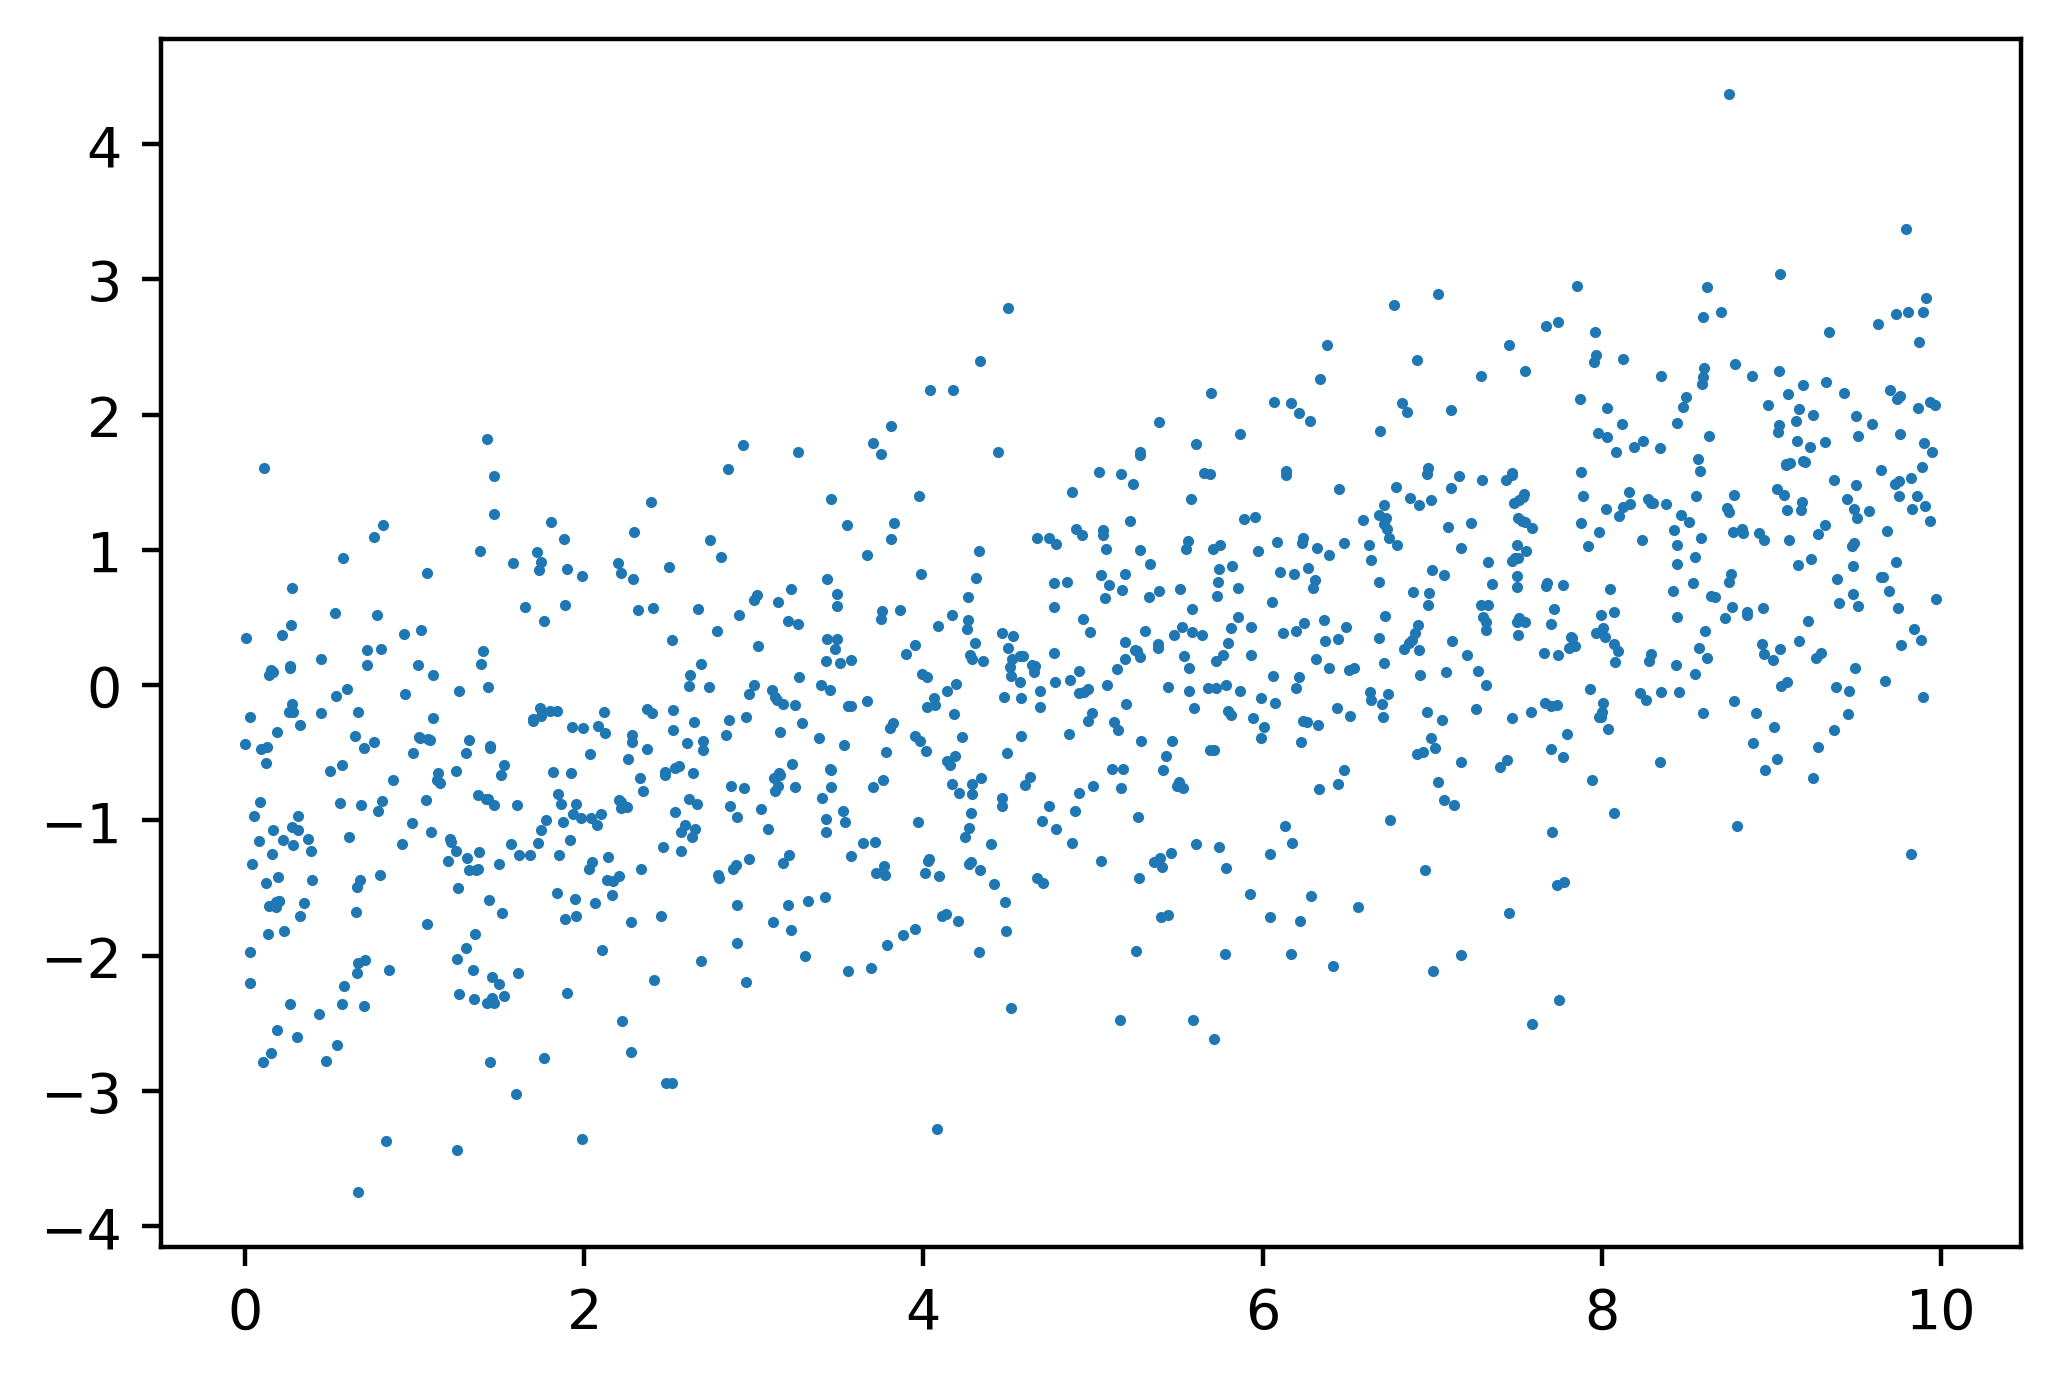

In [14]:
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X, y, s = 1)

### Exercício 8

In [15]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [16]:
lin_reg.fit(X.reshape(-1, 1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2080021895763124
[0.25106337]


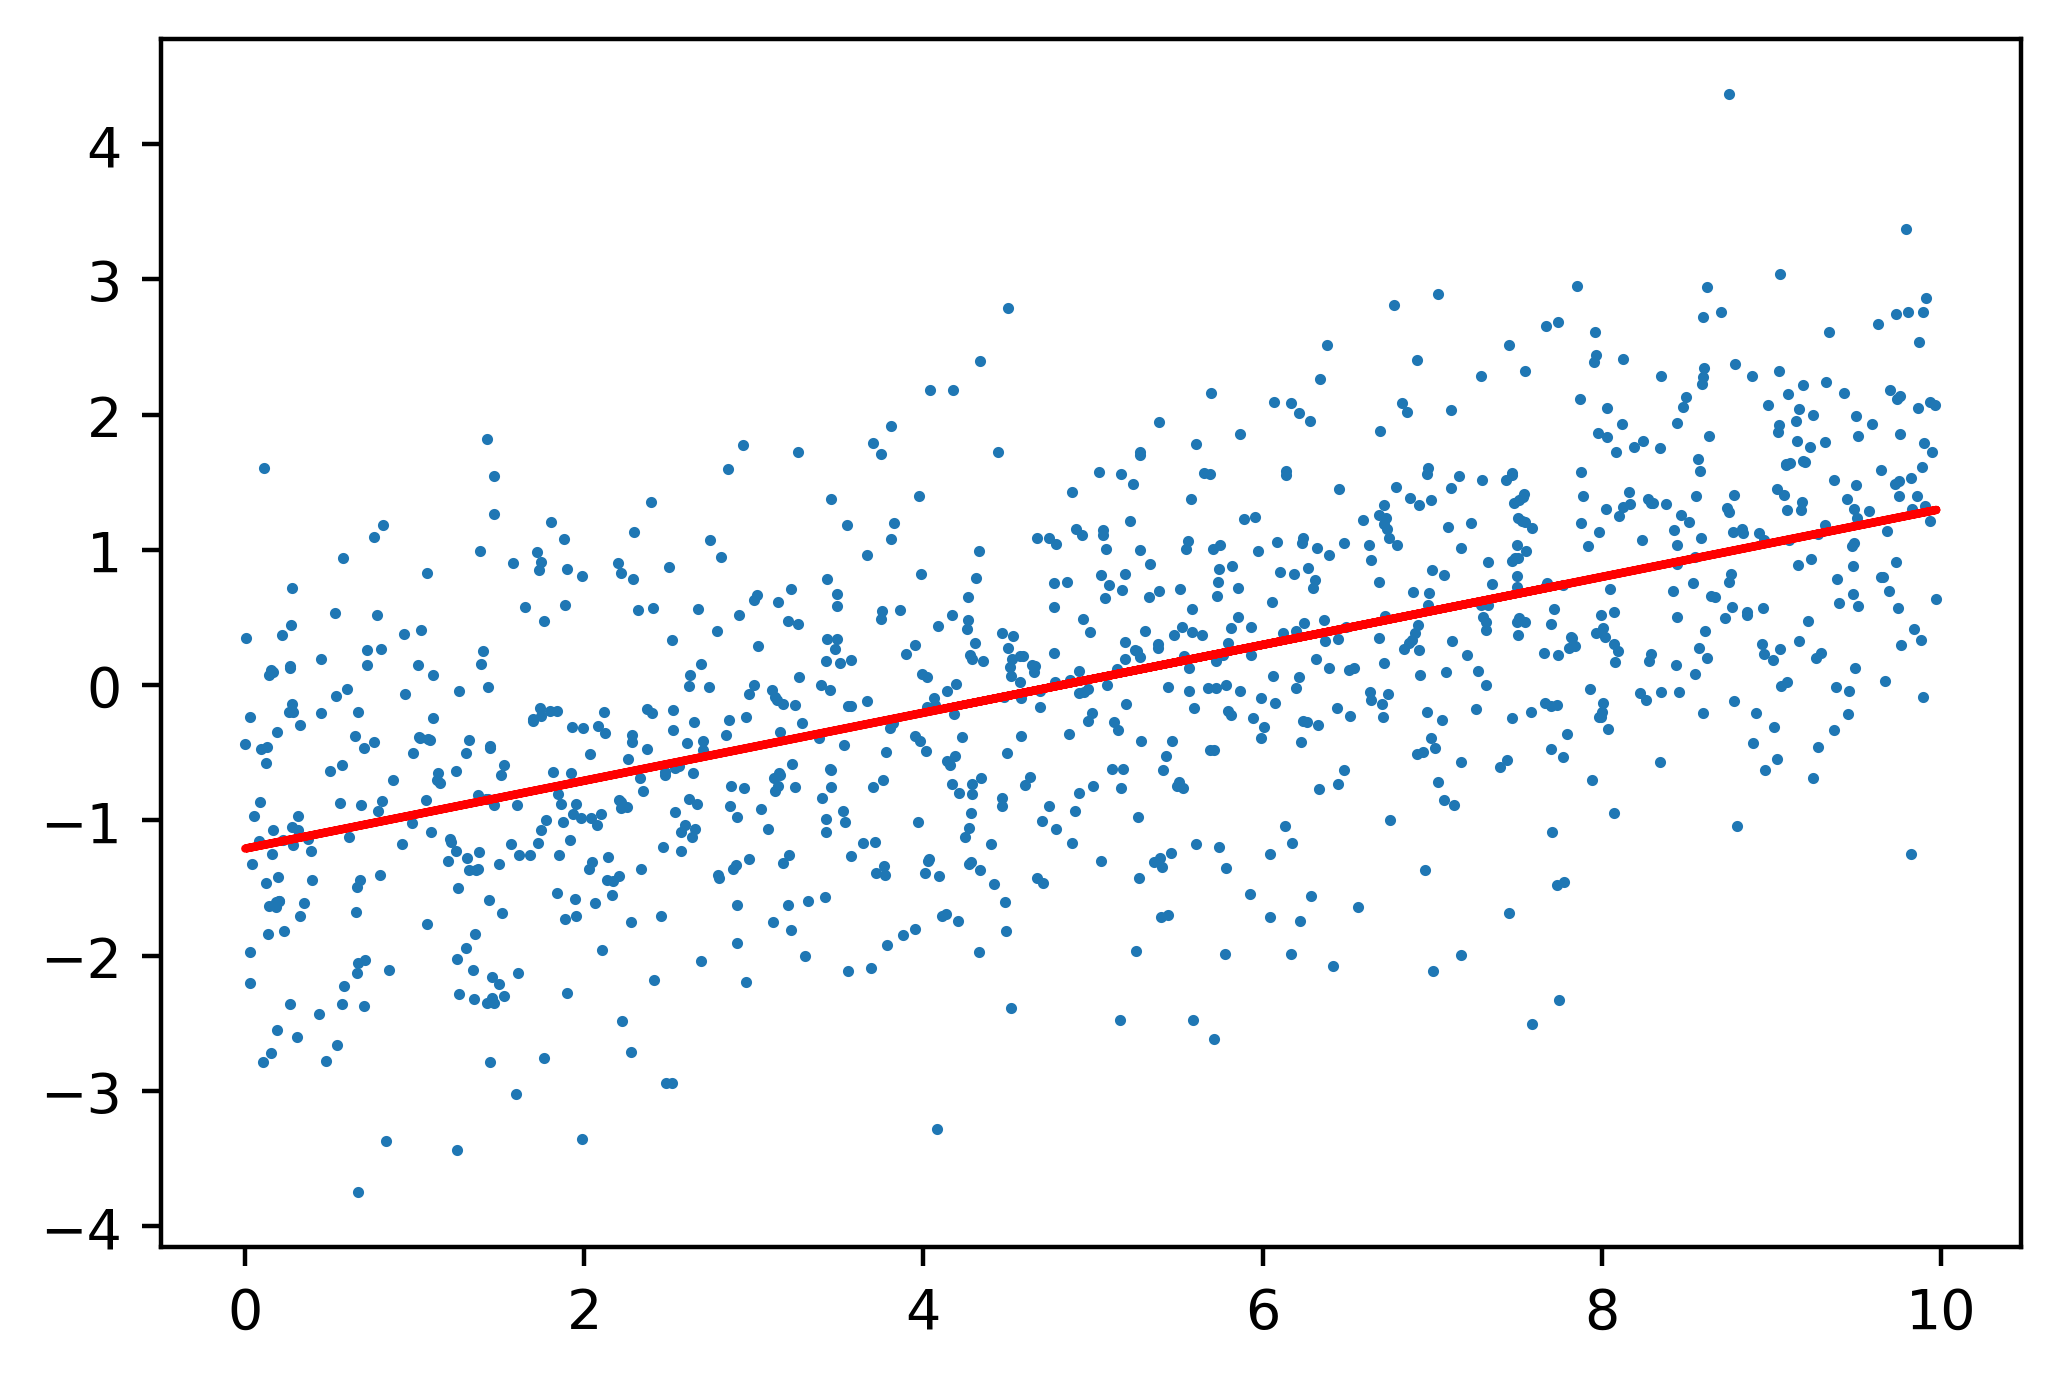

In [17]:
y_pred = lin_reg.predict(X.reshape(-1, 1))

plt.scatter(X, y, s = 1)
plt.plot(X, y_pred, 'r')

O resultado acima mostra uma linha vermelha com a função encontrada pelo regressor linear. Essa função, como pode ser vista numericamente mais acima, assumiu valores próximos para a inclinação e para o intercepto da função (-1.2 / -1.25 para o intercepto e 0.25 / 0.25 para a inclinação). O pequeno erro encontrado pode ser facilmente identificável como causado pelo ruído que foi acrescentado à massa de dados gerada.

As células abaixo utilizam o método train_test_split para separar os dados em um bloco de treino e um de teste. Esses blocos serão usados para treinar nosso modelo e testá-lo, verificando assim suas taxas de acerto.
Para a variável X, usaremos novamente a feature EDUCATION do nosso dataset, e para a variável Y usaremos a 'default payment next month'. A taxa de separação será de 20% para o teste e 80% para o treino.
Após essa separação, será usado um regressor logístico com alguns hiperparâmetros ajustados para gerar a previsão a partir dos dados separados anteriormente.
O primeiro modelo de validação será uma média dos valores acertados, que nos mostra que 78% dos valores foi previsto corretamente. Além dele, um score e um accuracy_score também são usados, todos apontando para a mesma taxa de acertos.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1, 1), df['default payment next month'].values, test_size = 0.2, random_state = 24)

In [19]:
example_lr = LogisticRegression()
example_lr.C = 0.1
example_lr.solver = 'liblinear'

example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

corretos = y_pred == y_test
np.mean(corretos)

0.7834239639977498

In [20]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

### Exercício 9

Nesse exercício serão calculadas, manualmente, as métricas para uma matriz de confusão. Essa matriz se compõe de 8 parâmetros importantes:

P - Número de valores positivos totais
N - Número de valores negativos totais

TP - True positive - Número de positivos verdadeiros. Ou seja, quando era esperado um positivo e foi encontrado um positivo.
FN - False negative - Número de negativos falsos. Ou seja, quando era esperado um positivo e foi encontrado um negativo.

TN - True negative - Número de negativos verdadeiros. Ou seja, quando era esperado um negativo e foi encontrado um negativo.
FP - False positive - Número de positivos falsos. Ou seja, quando era esperado um negativo e foi encontrado um positivo.

TPR - True postive rate - Proporção entre TP e a quantidade total de positivos.
FNR - False negative rate - Proporção entre FN e a quantidade total de positivos.

TNR - True negative rate - Proporção entre TN e quantidade total de negativos.
FPR - False positive rate - Proporção entre FP e quantidade total de negativos.

Importante notar que essas métricas são redundantes. Ou seja, basta saber as taxas TPR e FNR ou as taxas TNR e FPR para ser capaz de montar a matriz de confusão, uma vez que elas são espelhadas e complementares.

In [22]:
P = sum(y_test)
P

1155

In [23]:
TP = sum((y_test == 1) & (y_pred == 1))
TPR = TP / P
TPR

0.0

In [24]:
FN = sum((y_test == 1) & (y_pred == 0))
FNR = FN / P
FNR

1.0

In [25]:
N = sum(y_test == 0)
N

4178

In [26]:
TN = sum((y_test == 0) & (y_pred == 0))
TN

4178

In [27]:
FP = sum((y_test == 0) & (y_pred == 1))
FP

0

In [28]:
TNR = TN / N
FPR = FP / N

print('A taxa de True negative é {} e a False positive é {}'.format(TNR, FPR))

A taxa de True negative é 1.0 e a False positive é 0.0


A biblioteca sklearn oferece a função metrics.confusion_matrix, que permite calcular a matriz de confusão automaticamente, sem haver a necessidade de cálculo de cada variável de modo independente.
Ao fazer a matriz dessa forma, podemos ler o resultado como:

TN FP

FN TP

Sendo, mais uma vez, TN o True Negative, FP o False Positive, FN o False Negative e TP o True Positive.
Os valores apresentados estão em sua forma absoluta e não em valores relativos.

In [29]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])